In [3]:
import pandas as pd
import geopandas

The dataset below highlights information regarding the racial background of residents in different sections of Pittsburgh. In order to help determine what the "best neighborhood" in Pittsburgh is, I am analyzing which neighborhoods are the most racially diverse.  

In [4]:
#copy of first 10 entries from dataset
data = pd.read_csv("race.csv", index_col = "Id")
data.head(10)

,Neighborhood,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,Margin of Error; Total: - American Indian and Alaska Native alone,Estimate; Total: - Asian alone,...,Estimate; Total: - Native Hawaiian and Other Pacific Islander alone,Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two races including Some other race,Margin of Error; Total: - Two or more races: - Two races including Some other race,"Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races","Margin of Error; Total: - Two or more races: - Two races excluding Some other race, and three or more races"
Id,,,,,,,,,,,,,,,,,,,,,
1,Allegheny Center,1144.0,182.000000,603.0,132.000000,365.0,191.000000,0.0,10.000000,112.0,...,0.0,10.000000,0.0,10.000000,64.0,49.000000,0.0,10.000000,64.0,49.000000
2,Allegheny West,340.0,103.000000,278.0,87.000000,25.0,22.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,37.0,32.000000,0.0,10.000000,37.0,32.000000
3,Allentown,2624.0,499.013026,1438.0,350.058567,1005.0,466.086902,0.0,17.320508,0.0,...,0.0,17.320508,7.0,19.899749,174.0,132.815662,0.0,17.320508,174.0,132.815662
4,Arlington,1900.0,369.135476,1476.0,297.887563,408.0,234.618840,0.0,17.320508,0.0,...,0.0,17.320508,0.0,17.320508,16.0,26.305893,0.0,17.320508,16.0,26.305893
5,Arlington Heights,380.0,196.000000,69.0,89.000000,275.0,191.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,36.0,57.000000,0.0,10.000000,36.0,57.000000
6,Banksville,4132.0,504.457134,3328.0,438.085608,242.0,159.163438,21.0,27.367864,358.0,...,0.0,20.000000,0.0,20.000000,183.0,163.042939,24.0,39.949969,159.0,160.118706
7,Bedford Dwellings,1175.0,170.000000,28.0,36.000000,1101.0,175.000000,37.0,59.000000,9.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
8,Beechview,8227.0,765.057514,6609.0,676.677176,1094.0,340.396827,6.0,31.622777,108.0,...,0.0,31.622777,71.0,82.127949,339.0,167.430583,27.0,41.617304,312.0,165.012121
9,Beltzhoover,1911.0,347.266468,109.0,81.957306,1584.0,337.013353,0.0,20.000000,35.0,...,0.0,20.000000,54.0,85.767127,129.0,80.448741,0.0,20.000000,129.0,80.448741


<AxesSubplot:xlabel='Id'>

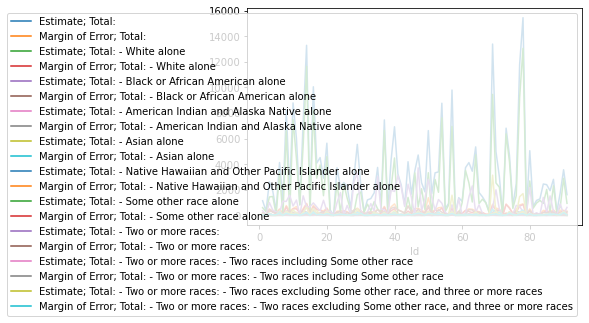

In [5]:
#just to see what it would do
data.plot()

In [35]:
df = pd.DataFrame(data)
stripped_df = df[["Neighborhood", "Estimate; Total:", "Estimate; Total: - White alone"]]
stripped_df

,Neighborhood,Estimate; Total:,Estimate; Total: - White alone
Id,,,
1,Allegheny Center,1144.0,603.0
2,Allegheny West,340.0,278.0
3,Allentown,2624.0,1438.0
4,Arlington,1900.0,1476.0
5,Arlington Heights,380.0,69.0
...,...,...,...
87,Upper Lawrenceville,2815.0,2311.0
88,West End,275.0,208.0
89,West Oakland,1757.0,650.0


In [42]:
##messy working code block 
# 1. Looking for a way to pull out the data for the estimate totals and compare to see 
#where bars are most even to represent diversity.

#data.groupby("Neighborhood").plot()

# 2. maybe instead look at members who are white alone compared to total sample

#data.groupby(["Neighborhood"], ["Estimate; Total:], ["Estimate; Total: - White alone"])

# 3. use a dataframe
                                
df = pd.DataFrame(data)
stripped_df = df[["Neighborhood", "Estimate; Total:", "Estimate; Total: - White alone"]]

#df[["Neighborhood", "Estimate; Total:", "Estimate; Total: - White alone"]]
                    
# 4. calculate percent of people who identify as White alone within total population of a neighborhood and compare across the board

for line in range(len(stripped_df)):
    prc = ((100*stripped_df.iloc[line,2])/stripped_df.iloc[line,1])
    print (stripped_df.iloc[line,0])
    print (prc)


#5. plot the data in a chloropleth

Allegheny Center
52.70979020979021
Allegheny West
81.76470588235294
Allentown
54.801829268292686
Arlington
77.6842105263158
Arlington Heights
18.157894736842106
Banksville
80.54211035818005
Bedford Dwellings
2.382978723404255
Beechview
80.33304971435517
Beltzhoover
5.703819989534275
Bloomfield
85.14896520354787
Bluff
73.93396382943422
Bon Air
98.07692307692308
Brighton Heights
75.24509803921569
Brookline
87.6898781771695
California-Kirkbride
16.50602409638554
Carrick
81.79196499602227
Central Business District
71.16984826235928
Central Lawrenceville
87.22886232846392
Central Northside
52.85027472527472
Central Oakland
81.52019844082211
Chartiers City
8.21256038647343
Chateau
nan
Crafton Heights
68.64951768488746
Crawford-Roberts
8.51063829787234
Duquesne Heights
96.14485981308411
East Allegheny
59.53324526640247
East Carnegie
78.94736842105263
East Hills
6.677852348993288
East Liberty
29.191428056906176
Elliott
74.55138662316476
Esplen
87.91208791208791
Fairywood
72.43377483443709
Fine

/Users/JalynnJohnson/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [43]:
#final code block

import pandas as pd
import geopandas
data = pd.read_csv("race.csv", index_col = "Id")
df = pd.DataFrame(data)

# 1. Look at members who are white alone compared to total sample
stripped_df = df[["Neighborhood", "Estimate; Total:", "Estimate; Total: - White alone"]]
                    
# 2. Calculate percent of people who identify as White alone within total population of a neighborhood and compare across the board

for line in range(len(stripped_df)):
    prc = ((100*stripped_df.iloc[line,2])/stripped_df.iloc[line,1])
    print (stripped_df.iloc[line,0])
    print (prc)

#percentages to be compared for 30% > percentages > 45%
#TBD for Final Submission Plot the data in a chloropleth


Allegheny Center
52.70979020979021
Allegheny West
81.76470588235294
Allentown
54.801829268292686
Arlington
77.6842105263158
Arlington Heights
18.157894736842106
Banksville
80.54211035818005
Bedford Dwellings
2.382978723404255
Beechview
80.33304971435517
Beltzhoover
5.703819989534275
Bloomfield
85.14896520354787
Bluff
73.93396382943422
Bon Air
98.07692307692308
Brighton Heights
75.24509803921569
Brookline
87.6898781771695
California-Kirkbride
16.50602409638554
Carrick
81.79196499602227
Central Business District
71.16984826235928
Central Lawrenceville
87.22886232846392
Central Northside
52.85027472527472
Central Oakland
81.52019844082211
Chartiers City
8.21256038647343
Chateau
nan
Crafton Heights
68.64951768488746
Crawford-Roberts
8.51063829787234
Duquesne Heights
96.14485981308411
East Allegheny
59.53324526640247
East Carnegie
78.94736842105263
East Hills
6.677852348993288
East Liberty
29.191428056906176
Elliott
74.55138662316476
Esplen
87.91208791208791
Fairywood
72.43377483443709
Fine

/Users/JalynnJohnson/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
